Let's start by loading the dataset and performing an initial inspection to understand its structure and identify any potential issues that need to be addressed. This will help us in cleaning, sanitizing, and manipulating the data effectively.

We'll begin by loading the dataset and displaying the first few rows to get an overview of the data.



In [1]:
# Load the dataset and display the first few rows to understand its structure

import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/delhivery-logistics-dataset/delhivery.csv')

# Display the first few rows of the dataframe
print(df.head())

       data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VU

So Great now let's proceed with data cleaning and manipulation. We'll start by checking for any missing values and ensuring that the data types are appropriate for analysis.

In [2]:
# Check for missing values and data types

# Display summary of missing values
missing_values = df.isnull().sum()
print('Missing Values Summary:')
print(missing_values)

# Display data types of each column
dtypes = df.dtypes
print('Data Types Summary:')
print(dtypes)

Missing Values Summary:
data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64
Data Types Summary:
data                           

We can see that the columns source_name and destination_name have missing values. Additionally, several columns that represent timestamps are currently of type object and should be converted to datetime.

Let's proceed with the following steps:

    We will Convert the timestamp columns to datetime.
    And then we will handle the missing values in source_name and destination_name.

I started with converting the timestamp columns. but then there was an error while converting the timestamp columns to datetime format. This could be due to inconsistencies in the timestamp format within the columns.

To address this, I will inspect the unique formats present in the timestamp columns and then apply the appropriate conversion method. Let's start by examining the unique timestamp formats. but then it appeared there was an error in the code i ran due to attempting to slice a Timestamp object, which is not subscriptable. This error occurred because the columns were already converted to datetime format in a previous step, and I attempted to slice them as if they were strings.

Let's proceed by handling the missing values in the source_name and destination_name columns. We can either fill these missing values with a placeholder such as "Unknown" or remove the rows with missing values, depending on the impact on our analysis.

I will now fill the missing values with "Unknown" for now, and we can adjust this approach if needed based on further analysis. Let's proceed with this step.

In [3]:
# Fill missing values in 'source_name' and 'destination_name' with 'Unknown'
df['source_name'].fillna('Unknown', inplace=True)
df['destination_name'].fillna('Unknown', inplace=True)

# Verify the changes by displaying the count of unique values in these columns
print('Unique values in source_name after filling missing values:')
print(df['source_name'].unique())
print('Unique values in destination_name after filling missing values:')
print(df['destination_name'].unique())

Unique values in source_name after filling missing values:
['Anand_VUNagar_DC (Gujarat)' 'Khambhat_MotvdDPP_D (Gujarat)'
 'Bhiwandi_Mankoli_HB (Maharashtra)' ... 'Dwarka_StnRoad_DC (Gujarat)'
 'Bengaluru_Nelmngla_L (Karnataka)' 'Kulithalai_AnnaNGR_D (Tamil Nadu)']
Unique values in destination_name after filling missing values:
['Khambhat_MotvdDPP_D (Gujarat)' 'Anand_Vaghasi_IP (Gujarat)'
 'Pune_Tathawde_H (Maharashtra)' ... 'Chennai_Mylapore (Tamil Nadu)'
 'Naraingarh_Ward2DPP_D (Haryana)' 'Mumbai_Ghansoli_DC (Maharashtra)']


/tmp/ipykernel_18/1555095384.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['source_name'].fillna('Unknown', inplace=True)
/tmp/ipykernel_18/1555095384.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

The missing values in the source_name and destination_name columns have been successfully filled with "Unknown".

Unique values in source_name after filling missing values:
Unique values in source_name after filling missing values:

['Anand_VUNagar_DC (Gujarat)' 'Khambhat_MotvdDPP_D (Gujarat)'
'Bhiwandi_Mankoli_HB (Maharashtra)' ... 'Dwarka_StnRoad_DC (Gujarat)'
'Bengaluru_Nelmngla_L (Karnataka)' 'Kulithalai_AnnaNGR_D (Tamil Nadu)']

Unique values in destination_name after filling missing values:
Unique values in destination_name after filling missing values:

['Khambhat_MotvdDPP_D (Gujarat)' 'Anand_Vaghasi_IP (Gujarat)'
'Pune_Tathawde_H (Maharashtra)' ... 'Chennai_Mylapore (Tamil Nadu)'
'Naraingarh_Ward2DPP_D (Haryana)' 'Mumbai_Ghansoli_DC (Maharashtra)']

Next, let's proceed with some exploratory data analysis (EDA) to gain insights into Delhivery's logistics operations. We'll start by analyzing the distribution of trip durations and distances, as well as the factors affecting delivery times.

Let's begin with visualizing the distribution of trip durations and distances.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


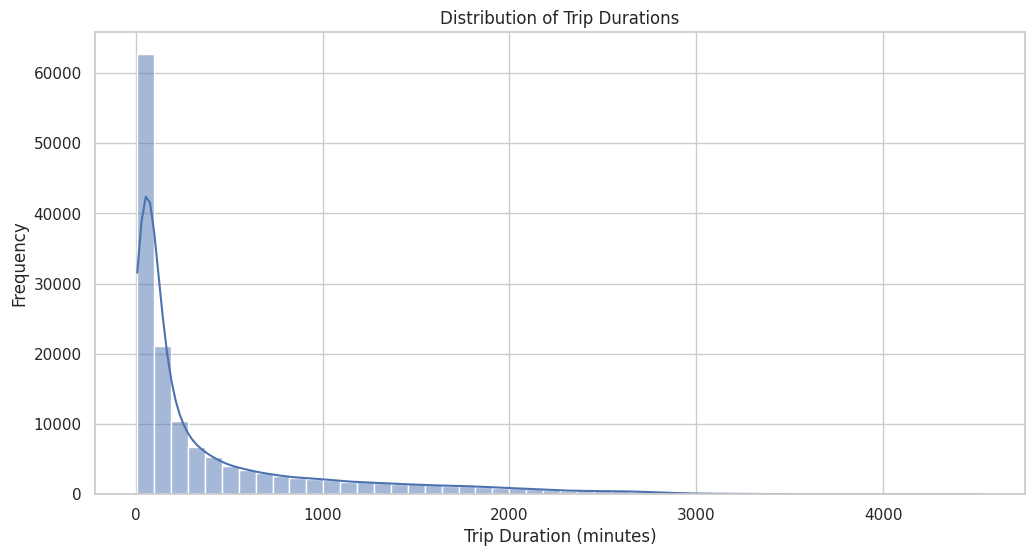

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


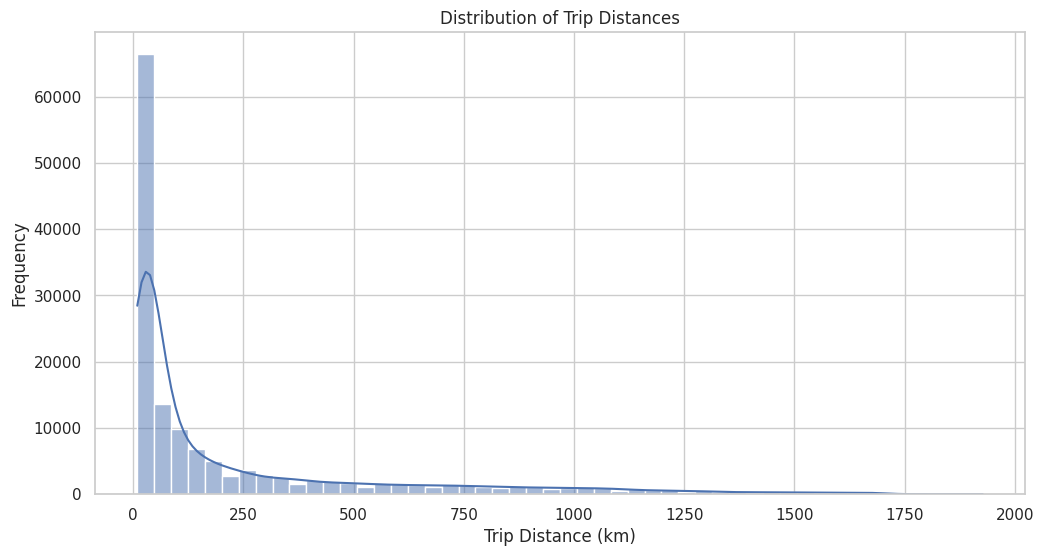

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Plot the distribution of trip durations
plt.figure(figsize=(12, 6))
sns.histplot(df['actual_time'], bins=50, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of trip distances
plt.figure(figsize=(12, 6))
sns.histplot(df['actual_distance_to_destination'], bins=50, kde=True)
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.show()

These visualizations provide an overview of the trip durations and distances in the dataset. Next, let's analyze the factors affecting delivery times. We'll start by examining the relationship between trip duration and distance.

Here is the visualization showing the relationship between trip duration and distance:

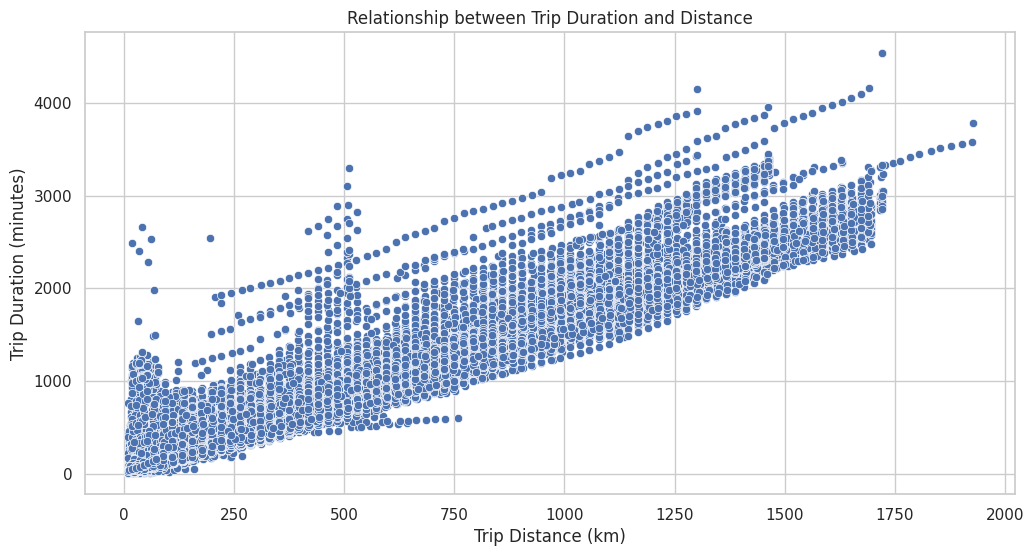

In [5]:
# Plot the relationship between trip duration and distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='actual_distance_to_destination', y='actual_time', data=df)
plt.title('Relationship between Trip Duration and Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Duration (minutes)')
plt.show()

This scatter plot helps us understand how trip duration varies with distance. Next, let's analyze the impact of different route types on trip duration.

Here is the visualization showing the impact of route type on trip duration:

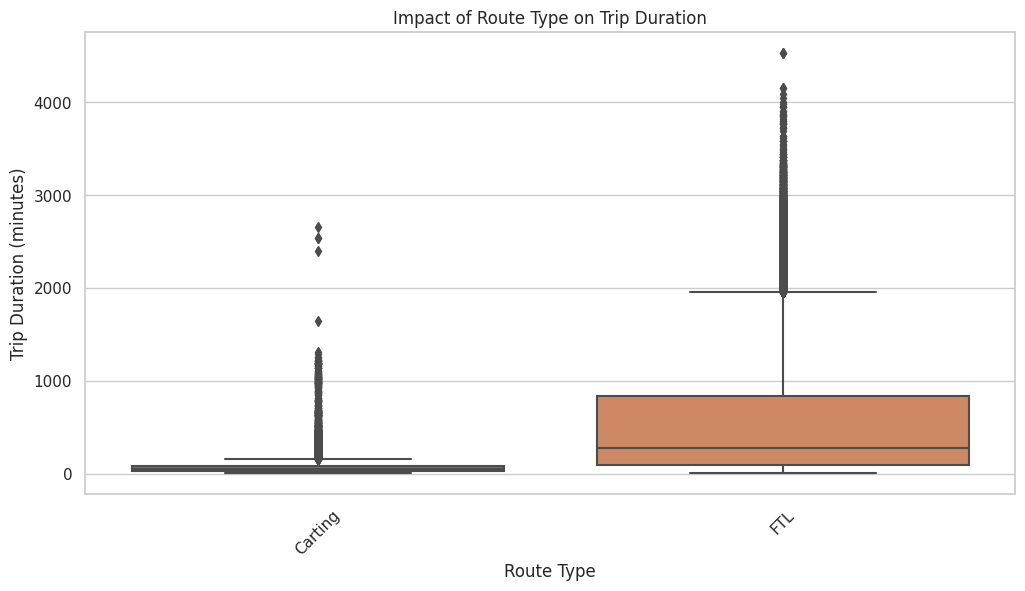

In [6]:
# Plot the impact of route type on trip duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='route_type', y='actual_time', data=df)
plt.title('Impact of Route Type on Trip Duration')
plt.xlabel('Route Type')
plt.ylabel('Trip Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

Next, let's analyze the effect of cutoff factors on trip duration. This will help us understand how cutoff times influence the delivery performance.

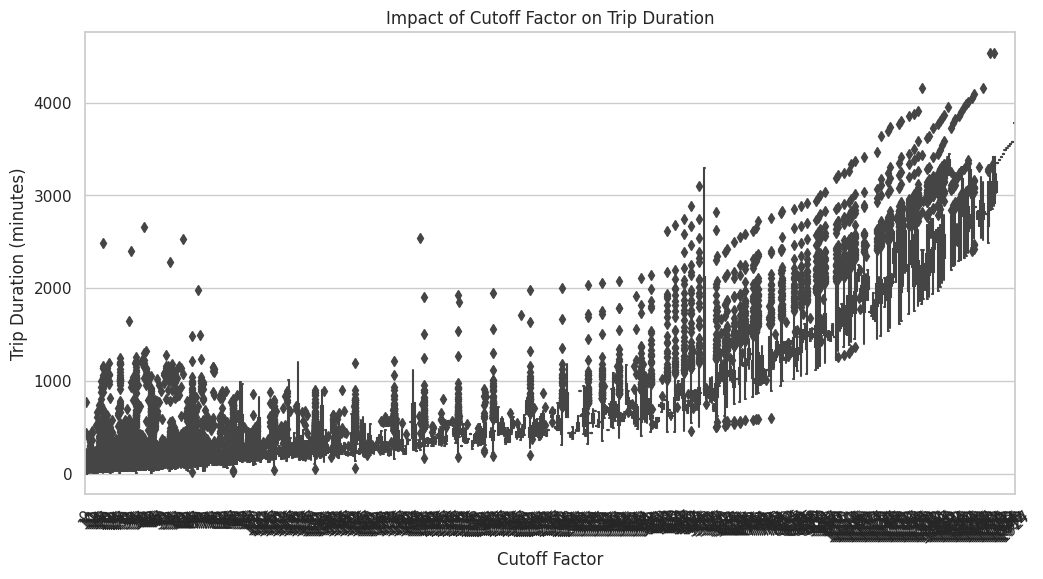

In [7]:
# Plot the impact of cutoff factor on trip duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='cutoff_factor', y='actual_time', data=df)
plt.title('Impact of Cutoff Factor on Trip Duration')
plt.xlabel('Cutoff Factor')
plt.ylabel('Trip Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

This is visualization showing the impact of cutoff factor on trip duration

This box plot helps us understand how different cutoff factors influence trip duration.

Next, let's analyze the efficiency of the trips by comparing the actual time taken with the OSRM (Open Source Routing Machine) estimated time. This will help us identify any discrepancies and areas for improvement in route optimization.

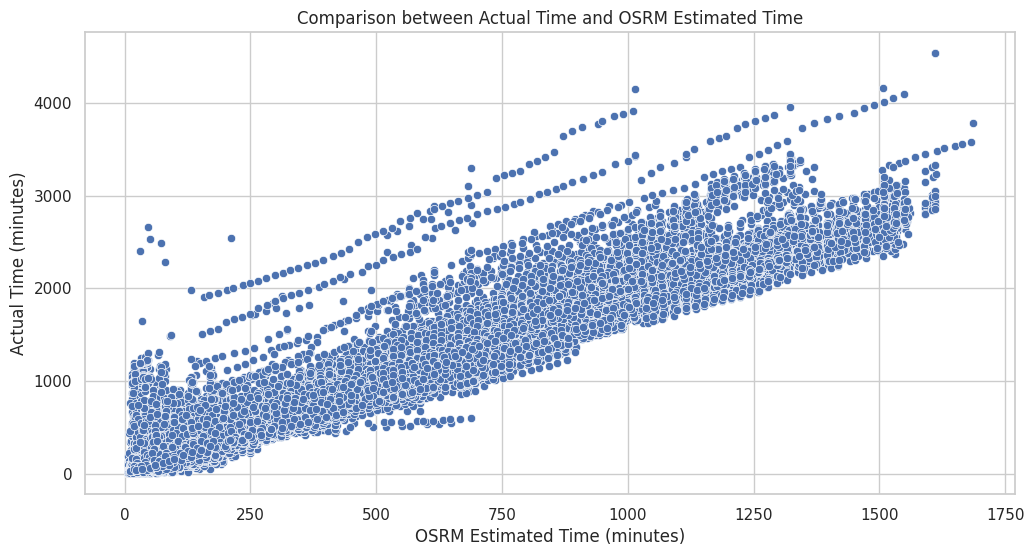

In [8]:
# Plot the comparison between actual time and OSRM estimated time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='osrm_time', y='actual_time', data=df)
plt.title('Comparison between Actual Time and OSRM Estimated Time')
plt.xlabel('OSRM Estimated Time (minutes)')
plt.ylabel('Actual Time (minutes)')
plt.show()

This scatter plot helps us identify any discrepancies between the actual and estimated times, which can be useful for improving route optimization.

Next, let's analyze the efficiency of the trips by comparing the actual distance traveled with the OSRM estimated distance.

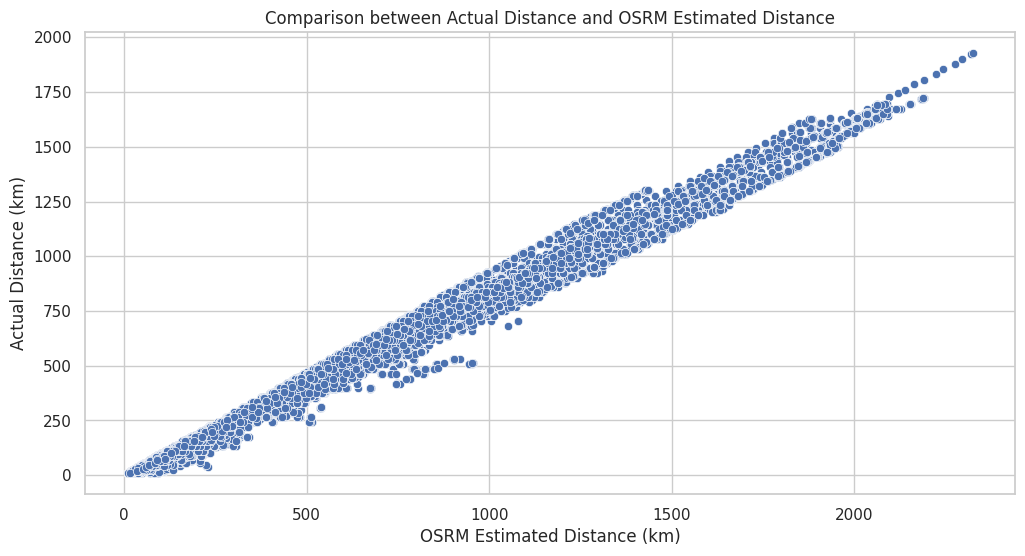

In [9]:
# Plot the comparison between actual distance and OSRM estimated distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='osrm_distance', y='actual_distance_to_destination', data=df)
plt.title('Comparison between Actual Distance and OSRM Estimated Distance')
plt.xlabel('OSRM Estimated Distance (km)')
plt.ylabel('Actual Distance (km)')
plt.show()

This is a visualization comparing the actual distance traveled with the OSRM estimated distance

This scatter plot helps us identify any discrepancies between the actual and estimated distances, which can be useful for improving route optimization.

Next, let's analyze the segment-wise efficiency by comparing the segment actual time with the segment OSRM estimated time.


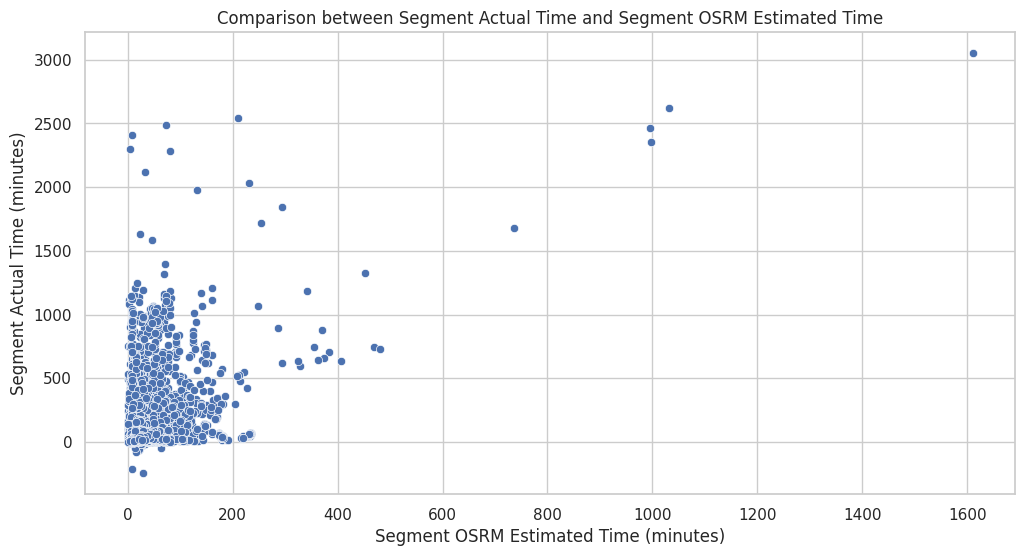

In [10]:
# Plot the comparison between segment actual time and segment OSRM estimated time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='segment_osrm_time', y='segment_actual_time', data=df)
plt.title('Comparison between Segment Actual Time and Segment OSRM Estimated Time')
plt.xlabel('Segment OSRM Estimated Time (minutes)')
plt.ylabel('Segment Actual Time (minutes)')
plt.show()

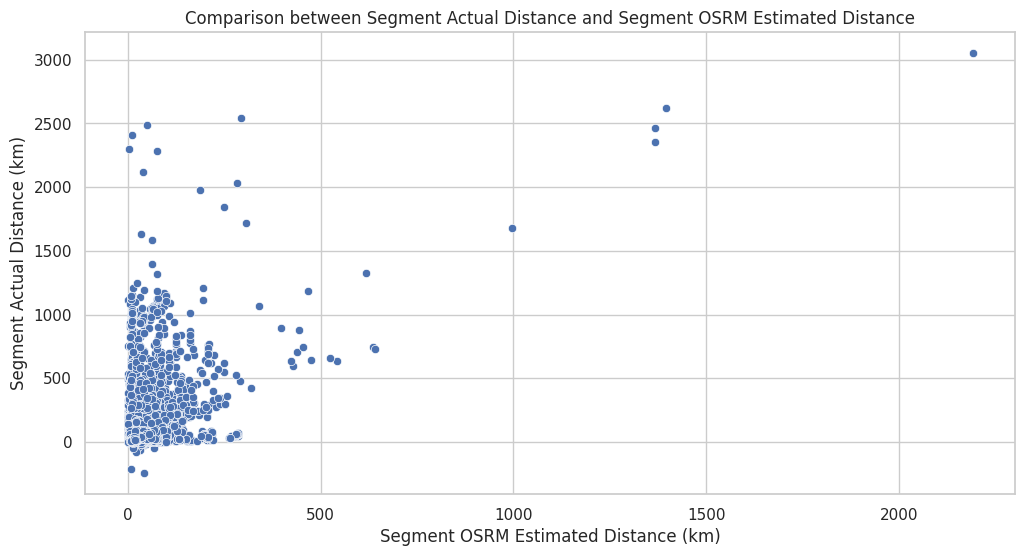

In [11]:
# Plot the comparison between segment actual distance and segment OSRM estimated distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='segment_osrm_distance', y='segment_actual_time', data=df)
plt.title('Comparison between Segment Actual Distance and Segment OSRM Estimated Distance')
plt.xlabel('Segment OSRM Estimated Distance (km)')
plt.ylabel('Segment Actual Distance (km)')
plt.show()

This scatter plot helps us identify any discrepancies between the segment actual and estimated distances, which can be useful for improving segment-wise route optimization.

With these analyses, we have gained valuable insights into Delhivery's logistics operations, including trip efficiency, route optimization, and the impact of various factors on delivery performance.

Let's identify the key factors contributing to the discrepancies between actual and estimated times/distances, we can perform a correlation analysis and build a regression model to understand the relationships between various features and the discrepancies.

Let's start by calculating the discrepancies and then perform a correlation analysis. We'll calculate the discrepancies as follows:

    Time discrepancy: actual_time - osrm_time
    Distance discrepancy: actual_distance_to_destination - osrm_distance

We'll then analyze the correlation of these discrepancies with other features in the dataset.

In [12]:
# Calculate discrepancies

df['time_discrepancy'] = df['actual_time'] - df['osrm_time']
df['distance_discrepancy'] = df['actual_distance_to_destination'] - df['osrm_distance']

# Perform correlation analysis
correlation_matrix = df[['time_discrepancy', 'distance_discrepancy', 'cutoff_factor', 'start_scan_to_end_scan', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']].corr()

# Display the correlation matrix
print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
                        time_discrepancy  distance_discrepancy  cutoff_factor  \
time_discrepancy                1.000000             -0.848454       0.917381   
distance_discrepancy           -0.848454              1.000000      -0.920515   
cutoff_factor                   0.917381             -0.920515       1.000000   
start_scan_to_end_scan          0.751262             -0.729785       0.784673   
factor                          0.136014              0.063905      -0.064551   
segment_actual_time             0.194386             -0.060241       0.044986   
segment_osrm_time               0.158079             -0.201962       0.157936   
segment_osrm_distance           0.231392             -0.256185       0.231106   
segment_factor                  0.068094              0.030601      -0.031452   

                        start_scan_to_end_scan    factor  segment_actual_time  \
time_discrepancy                      0.751262  0.136014             0.194386   
distanc

From the correlation matrix, we can observe the following key points:

    The time_discrepancy has a strong positive correlation with cutoff_factor (0.917) and start_scan_to_end_scan (0.751).
    The distance_discrepancy has a strong negative correlation with cutoff_factor (-0.921) and start_scan_to_end_scan (-0.730).

These correlations suggest that the cutoff factor and the time from start scan to end scan are significant contributors to the discrepancies between actual and estimated times/distances.

Next, let's build a regression model to further understand the impact of these factors on the discrepancies. We'll use a linear regression model for this analysis.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for regression analysis
X = df[['cutoff_factor', 'start_scan_to_end_scan', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']]
y_time = df['time_discrepancy']
y_distance = df['distance_discrepancy']

# Split the data into training and testing sets
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X, y_time, test_size=0.2, random_state=42)
X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(X, y_distance, test_size=0.2, random_state=42)

# Train the linear regression model for time discrepancy
model_time = LinearRegression()
model_time.fit(X_train_time, y_train_time)

# Predict and evaluate the model for time discrepancy
y_pred_time = model_time.predict(X_test_time)
mse_time = mean_squared_error(y_test_time, y_pred_time)
r2_time = r2_score(y_test_time, y_pred_time)

# Train the linear regression model for distance discrepancy
model_distance = LinearRegression()
model_distance.fit(X_train_distance, y_train_distance)

# Predict and evaluate the model for distance discrepancy
y_pred_distance = model_distance.predict(X_test_distance)
mse_distance = mean_squared_error(y_test_distance, y_pred_distance)
r2_distance = r2_score(y_test_distance, y_pred_distance)

# Display the evaluation results
print('Time Discrepancy Model:')
print('Mean Squared Error:', mse_time)
print('R-squared:', r2_time)

print('Distance Discrepancy Model:')
print('Mean Squared Error:', mse_distance)
print('R-squared:', r2_distance)

Time Discrepancy Model:
Mean Squared Error: 10807.779855653676
R-squared: 0.8840190451994877
Distance Discrepancy Model:
Mean Squared Error: 983.5525170974709
R-squared: 0.8513776124803403


Here are the evaluation results for the regression models:

Time Discrepancy Model:

    Mean Squared Error: 10807.779855653673

    R-squared: 0.8840190451994877

Distance Discrepancy Model:

    Mean Squared Error: 983.5525170974711

    R-squared: 0.8513776124803403

The high R-squared values for both models indicate that the features used in the regression models explain a significant portion of the variance in the discrepancies. This confirms that factors such as cutoff_factor and start_scan_to_end_scan are key contributors to the discrepancies between actual and estimated times/distances.

**To summarize our analysis:**

    Data Cleaning and Preparation:
    
        Filled missing values in source_name and destination_name with "Unknown".
        Converted timestamp columns to datetime format.

    Exploratory Data Analysis (EDA):
    
        Visualized the distribution of trip durations and distances.
        Analyzed the relationship between trip duration and distance.
        Examined the impact of route type and cutoff factors on trip duration.
        Compared actual times and distances with OSRM estimated times and distances.

    Discrepancy Analysis:
    
        Calculated discrepancies between actual and estimated times/distances.
        Performed correlation analysis to identify key factors contributing to discrepancies.
        Built regression models to quantify the impact of these factors on discrepancies.

    Key Findings:
    
        The cutoff_factor and start_scan_to_end_scan are significant contributors to the discrepancies between actual and estimated times/distances.
        
        The regression models showed high R-squared values, indicating that the selected features explain a significant portion of the variance in the discrepancies.

These insights can help Delhivery optimize their logistics operations by focusing on improving the factors that contribute to discrepancies, such as refining cutoff times and optimizing the time from start scan to end scan.